# Group 17 DSCI Project (Section 007)
### Predicting diabetes based on demographic attributes, medical history, and clinical measurements

Darby Quinn #19752633 <br>
Manav Parikh #13928775 <br>
Nitya Goel #89433221 <br>
Reeva Bansal #68061514 <br>

### Introduction

Diabetes is a chronic condition related to the pancreas that can affect people of all ages. In individuals with type 1 diabetes, the pancreas is simply unable to make any insulin. In type 2 diabetes, the body does not make enough insulin, or cannot process insulin properly. This can cause serious health problems such as heart disease, vision loss, kidney disease and high blood pressure. There are certain medical factors (e.g. BMI, age, insulin and glucose levels) that can help predict whether an individual is likely to have or develop diabetes. Using these factors and making predictions on whether someone has diabetes can help ensure that proper precautions are taken or treatments are administered to manage the negative short and long term effects of diabetes.

The question we aim to answer is: **Can we classify whether or not someone has diabetes based on their age, insulin, BMI, and glucose levels?**

The dataset we are using to answer this question is a Diabetes dataset from the online website Kaggle. This set contains nine different columns: number of pregnancies; blood glucose level; BP; skin thickness; blood insulin level; BMI; diabetes pedigree function; age; and outcome. It is a .csv file that is pre-divided into training and testing data. The dataset has previously been useful in using classification to predict diabetes outcome, as well as studying risk factors and diabetes management. 

In [1]:
#loading libraries needed to perform classification and analysis
library(tidyverse)
library(dplyr)
library(repr)
library(tidymodels)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_co

### Methods & Results

Our goal with this data set is to create a classification model that can help us predict whether or not an individual has diabetes. <br> The general procedure we will follow to create this classifier will be:
1. Reading the testing/training data sets into R from the web
2. Ensuring the data set is in a tidy format
3. Performing summary statistics on the data set
4. Creating an exploratory visualization of the data set
5. Summarizing the data set to select the predictor variables
6. Determining the best K-value to use by cross validation
7. Creating the the K-nearest neighbors classifier with the training set 
8. Determining the accuracy of the classifier with the testing set

#### 1. Reading the testing/training data sets into R from the web
Our first step is to load in our data set. The data set is located on kaggle at https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset/data. We will load the training and testing data into R using the download.file and read.csv functions, then display the first 6 observations of each set.

In [2]:
#reading in training data
url <- "https://raw.githubusercontent.com/nityag11/DSCI-100-group17-project/main/Training%20(1).csv"
download.file(url, "Training (1).csv")
training_data <- read.csv("Training (1).csv")
head(training_data)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1 6           148     72            35              0     33.6
2 1            85     66            29              0     26.6
3 8           183     64             0              0     23.3
4 1            89     66            23             94     28.1
5 0           137     40            35            168     43.1
6 5           116     74             0              0     25.6
  DiabetesPedigreeFunction Age Outcome
1 0.627                    50  1      
2 0.351                    31  0      
3 0.672                    32  1      
4 0.167                    21  0      
5 2.288                    33  1      
6 0.201                    30  0

Table 1: Raw Diabetes Training Data

In [3]:
#reading in testing data
url <- "https://raw.githubusercontent.com/nityag11/DSCI-100-group17-project/main/Testing.csv"
download.file(url, "Testing.csv")
testing_data <- read.csv("Testing.csv")
head(testing_data)

Pregnancies Glucose BloodPressure SkinThickness Insulin BMI 
1  9          120     72            22             56     20.8
2  1           71     62             0              0     21.8
3  8           74     70            40             49     35.3
4  5           88     78            30              0     27.6
5 10          115     98             0              0     24.0
6  0          124     56            13            105     21.8
  DiabetesPedigreeFunction Age Outcome
1 0.733                    48  0      
2 0.416                    26  0      
3 0.705                    39  0      
4 0.258                    37  0      
5 1.022                    34  0      
6 0.452                    21  0

Table 2: Raw Diabetes Testing Data

#### 2. Ensuring the data set is in a tidy format
"Tidy data" refers to a data set in a specific format where every variable has its own column, each observation has its own row, and each value has its own cell. By inspecting the training and testing data frames above, we can determine that they are already in tidy format. This means we will not have to do any preliminary wrangling. Additionally, since the sets are already split into training and testing, we will not have to do this before creating the classifier.

#### 3. Performing summary statistics on the data set
Our third step is to perform some exploratory analysis by calculating statistics on our data sets. This will include checking for missing values and determining the mean of each predictor variable in the diabetes data.

To start, we will determine whether or not there are any missing values in the training and testing data sets using the map_df function. The findings will be shown clearly in a table.

In [4]:
#checking for NAs in training dataset
training_missing <- training_data |>
    map_df(is.na) |>
    group_by(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome) |>
    summarize()

training_missing_table <- training_missing |>
    pivot_longer(Pregnancies:Outcome, names_to = "Variable", values_to = "Has NA")
training_missing_table

`summarise()` has grouped output by 'Pregnancies', 'Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'. You can
override using the `.groups` argument.


Variable                 Has NA
1 Pregnancies              FALSE 
2 Glucose                  FALSE 
3 BloodPressure            FALSE 
4 SkinThickness            FALSE 
5 Insulin                  FALSE 
6 BMI                      FALSE 
7 DiabetesPedigreeFunction FALSE 
8 Age                      FALSE 
9 Outcome                  FALSE

Table 3: NAs in Training Data

In [5]:
#checking for NAs in testing dataset
testing_missing <- testing_data |>
    map_df(is.na) |>
    group_by(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, Outcome) |>
    summarize()

testing_missing_table <- testing_missing |>
    pivot_longer(Pregnancies:Outcome, names_to = "Variable", values_to = "Has NA")
testing_missing_table

`summarise()` has grouped output by 'Pregnancies', 'Glucose', 'BloodPressure',
'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'. You can
override using the `.groups` argument.


Variable                 Has NA
1 Pregnancies              FALSE 
2 Glucose                  FALSE 
3 BloodPressure            FALSE 
4 SkinThickness            FALSE 
5 Insulin                  FALSE 
6 BMI                      FALSE 
7 DiabetesPedigreeFunction FALSE 
8 Age                      FALSE 
9 Outcome                  FALSE

Table 4: NAs in Testing Data

Tables 3 and 4 clearly show that the data set has no missing values across all variables. <br> 

For further exploration, we will create a table of the mean of each numerical predictor variable in the training and testing set. We choose to remove the DiabetesPedigreeFunction and Outcome columns in the mean calculation.

In [6]:
#creating table for mean of all training variables
training_mean <- training_data |>
    select(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age) |>
    map_df(mean)

training_mean_table <- training_mean |>
    pivot_longer(Pregnancies:Age, names_to = "Variable", values_to = "Mean")
training_mean_table

Variable      Mean     
1 Pregnancies     3.81748
2 Glucose       121.60203
3 BloodPressure  68.91504
4 SkinThickness  20.53130
5 Insulin        80.11992
6 BMI            31.99045
7 Age            32.82195

Table 5: Means of Variables in Training Data

In [7]:
#creating table for mean of all testing variables
testing_mean <- testing_data |>
    select(Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, Age) |>
    map_df(mean)

testing_mean_table <- testing_mean |>
    pivot_longer(Pregnancies:Age, names_to = "Variable", values_to = "Mean")
testing_mean_table

Variable      Mean      
1 Pregnancies     3.863636
2 Glucose       119.983766
3 BloodPressure  69.503247
4 SkinThickness  20.694805
5 Insulin        77.724026
6 BMI            31.865909
7 Age            33.730519

Table 6: Means of Variables in Testing Data

Tables 5 and 6 show us the means of some variables of interest. They appear to be similar across the training and testing data sets.

#### 4. Creating an exploratory visualization of the dataset
Our fourth step is to create an exploratory visualization of the data set. The goal of this visualization is to determine which of the variables would be best to create our classifier with. This will be done by selecting some variables of interest, ploting them against each other, and coloring the points based on the diabetes outcome. If there is a noticable correlation between the outcome and the variable, we will use it in our classifier. <br>

Since the variables we were initially interested in include age, glucose level, insulin level, and BMI, we will use these in the following scatter plots. Before making the plot, we will also mutate the data set so that the Outcome column is a factor instead of an integer and can be used as our label.

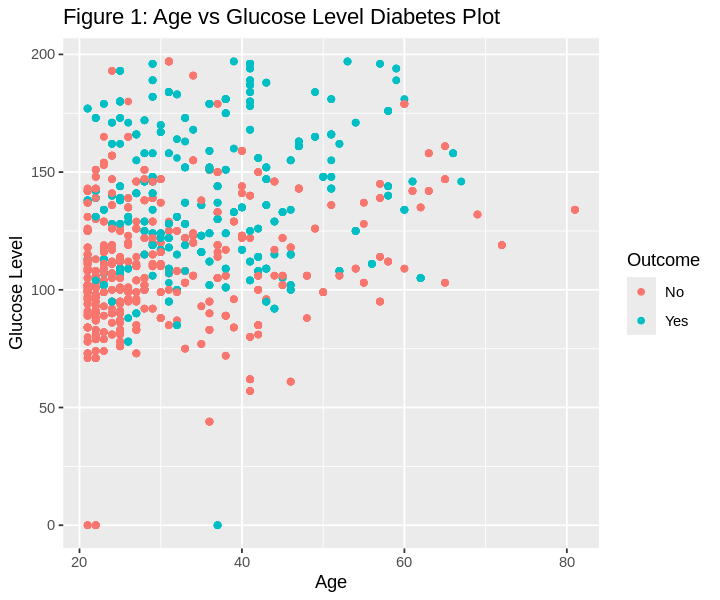

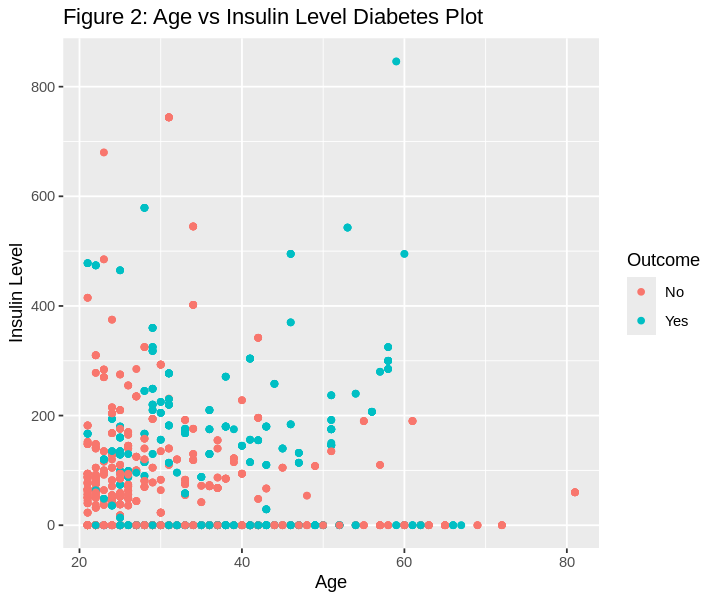

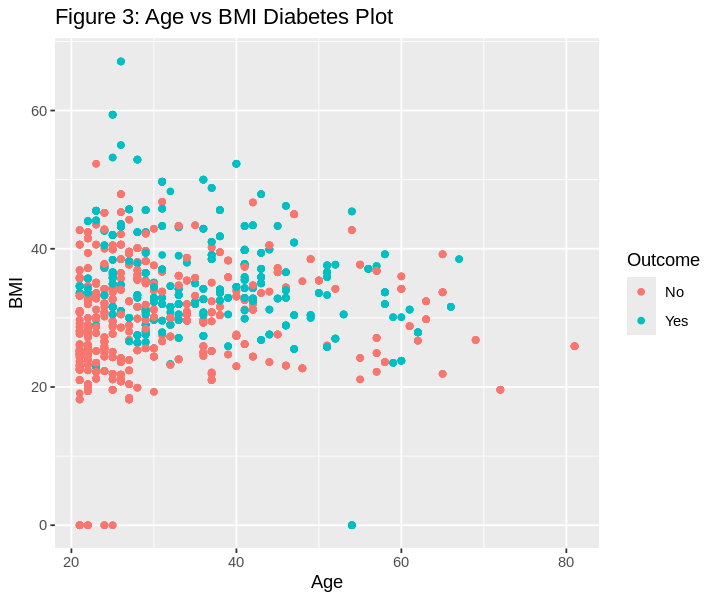

In [8]:
#changing outcome variable from <int> to <fct>
training_data <- training_data |>
    mutate(Outcome = as_factor(Outcome)) |>
    mutate(Outcome = fct_recode(Outcome, "Yes" = "1", "No" = "0")) 

testing_data <- testing_data |>
    mutate(Outcome = as_factor(Outcome)) |>
    mutate(Outcome = fct_recode(Outcome, "Yes" = "1", "No" = "0")) 

#creating comparison plots
options(repr.plot.height = 5, repr.plot.width = 6)
age_glucose_plot <- training_data |>
    ggplot(aes(x = Age, y = Glucose, color = Outcome)) +
    geom_point() +
    labs(x = "Age", y = "Glucose Level", title = "Figure 1: Age vs Glucose Level Diabetes Plot")
age_glucose_plot

options(repr.plot.height = 5, repr.plot.width = 6)
age_glucose_plot <- training_data |>
    ggplot(aes(x = Age, y = Insulin, color = Outcome)) +
    geom_point() +
    labs(x = "Age", y = "Insulin Level", title = "Figure 2: Age vs Insulin Level Diabetes Plot")
age_glucose_plot

options(repr.plot.height = 5, repr.plot.width = 6)
age_BMI_plot <- training_data |>
    ggplot(aes(x = Age, y = BMI, color = Outcome)) +
    geom_point() +
    labs(x = "Age", y = "BMI", title = "Figure 3: Age vs BMI Diabetes Plot")
age_BMI_plot

Inspection of the above plots reveals that there is some correlation between higher age and likelihood of diabetes. There is also a visible increase in diabetes with higher glucose levels. The Age vs Insulin and Age vs BMI plots appear to be more inconclusive, with the points being clustered in a large group with less of a clear distinction. This leads us to chose Age and Glucose as our two predictor variables for this classifier. <br>

Our research question can be narrowed down to: **Can we classify whether or not someone has diabetes based on their age and glucose levels?**

#### 5. Summarizing the data to select the predictor variables
Now that we have determined our predictor variables, our next step is to wrangle the datasets so that they only contain the variables of interest. In our case, these are Age, Glucose, and the Outcome. This will be done through the select function. The Outcome variable will be renamed to Diabetes_Outcome using the rename function.

In [9]:
#summarizing training data
training_data_small <- training_data |>
    select(Age, Glucose, Outcome) |>
    rename(Diabetes_Outcome = Outcome)
head(training_data_small)

Age Glucose Diabetes_Outcome
1 50  148     Yes             
2 31   85     No              
3 32  183     Yes             
4 21   89     No              
5 33  137     Yes             
6 30  116     No

Table 7: Summarized Training Data 

In [10]:
#summarizing testing data
testing_data_small <- testing_data |>
    select(Age, Glucose, Outcome) |>
    rename(Diabetes_Outcome = Outcome)
head(testing_data_small)

Age Glucose Diabetes_Outcome
1 48  120     No              
2 26   71     No              
3 39   74     No              
4 37   88     No              
5 34  115     No              
6 21  124     No

Table 8: Summarized Testing Data

Our final step before starting the formal classification is to visualize the predictor variables using histogram plots for both the training and testing data sets.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


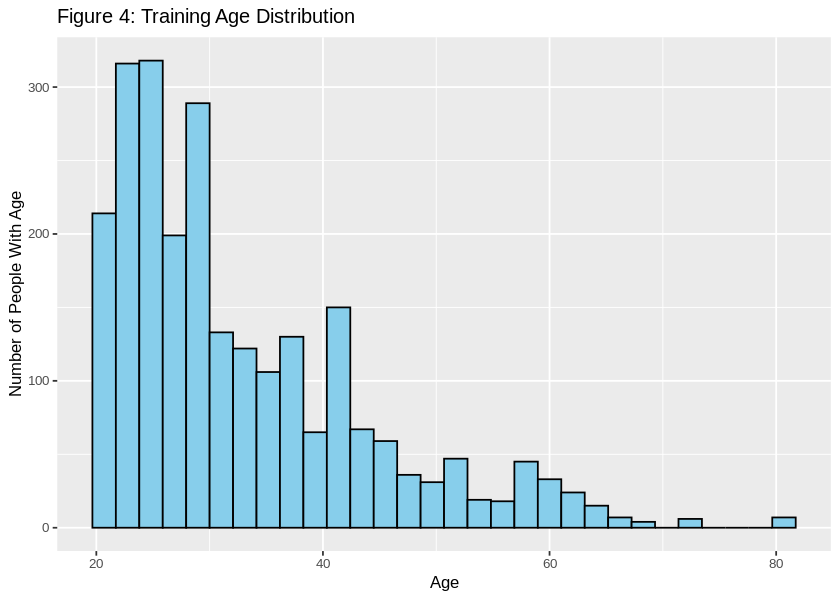

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


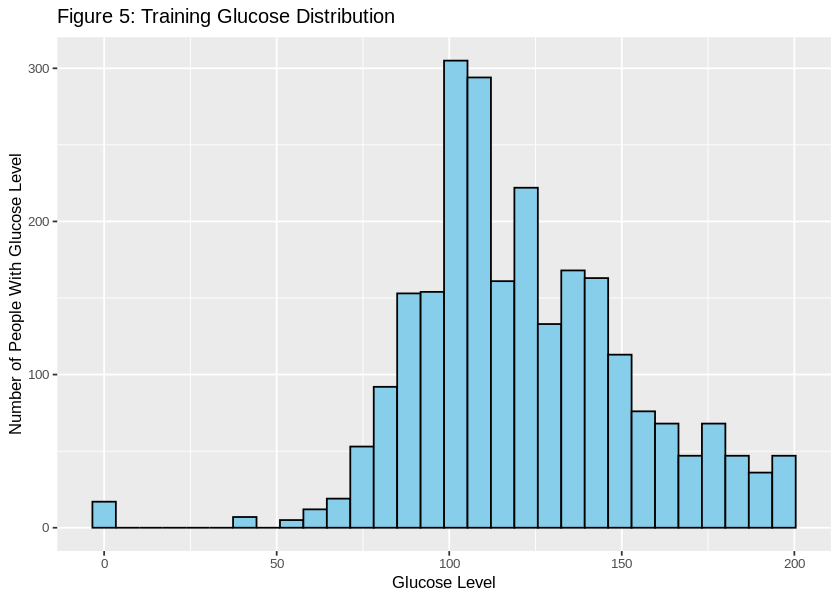

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


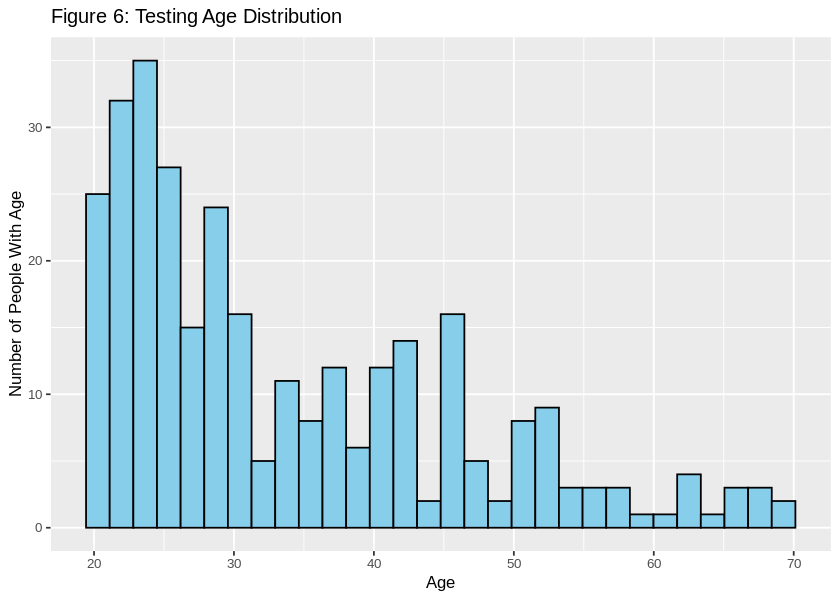

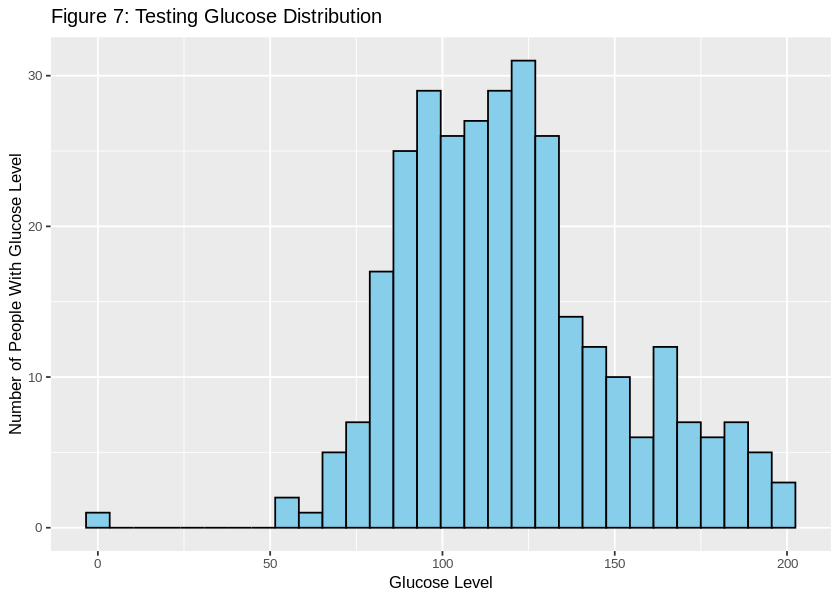

In [11]:
options(repr.plot.width=7, repr.plot.height=5)
#histogram for training age distribution
training_age_distribution <- training_data_small |>
    ggplot(aes(x = Age)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Age", y = "Number of People With Age") +
    ggtitle("Figure 4: Training Age Distribution") +
    theme(text = element_text(size = 10))
training_age_distribution

#histogram for training Glucose distribution
training_glucose_distribution <- training_data_small |>
    ggplot(aes(x = Glucose)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Glucose Level", y = "Number of People With Glucose Level") +
    ggtitle("Figure 5: Training Glucose Distribution") +
    theme(text = element_text(size = 10))
training_glucose_distribution

#histogram for testing age distribution
testing_age_distribution <- testing_data_small |>
    ggplot(aes(x = Age)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Age", y = "Number of People With Age") +
    ggtitle("Figure 6: Testing Age Distribution") +
    theme(text = element_text(size = 10))
testing_age_distribution

#histogram for testing Glucose distribution
testing_glucose_distribution <- testing_data_small |>
    ggplot(aes(x = Glucose)) +
    geom_histogram(color = "black", fill = "skyblue") + 
    labs(x = "Glucose Level", y = "Number of People With Glucose Level") +
    ggtitle("Figure 7: Testing Glucose Distribution") +
    theme(text = element_text(size = 10))
testing_glucose_distribution


By inspecting the above histograms, we can compare the distributions between the training and testing data.

**Number of people with age vs Age (training vs testing)**

The training age distribution is right-skewed, with its center around the 20-30 age range, a broad spread from early 20s to over 80, and a long right tail, indicating that fewer people are represented as age increases. In comparison, the testing age distribution, also right-skewed, has a higher and narrower peak around the 20-25 age range, suggesting a younger median age, with a shorter spread, topping out around 70, and less pronounced tail, which, along with lower overall frequencies, implies a smaller sample size than the training distribution. Both distributions share a common trend of declining frequency with increasing age but differ in range and concentration of data points.

**Number of people with glucose level vs Glucose Level (training vs testing)**

The training glucose level distribution is a bell-shaped curve with outlier at 0. It is not symmetrical on either sides of the peak. There is a particularly broad spread from 500’s to 520’s. The centre is at 500 with the range from about 0 to 100. This indicates that the majority of individuals have glucose level values concentrated around a central value of 500, with fewer individuals having lower values. However, the testing glucose level distribution is a bell-shaped curve with a modest left skew, peaking around a glucose level of 520. It has an outlier at 0. The curve is almost symmetrical but is little stretched out towards the left side, ranging from about 0 to 100. Overall, both of the graphs are bell-shaped, but the testing one is a little left skewed which means the central tendency of the distribution (mean, median, mode) is typically close to each other but not very close because of the skewness.

#### 6. Determining the best K-value to use by cross validation
Now that the exploratory analysis is complete, we move onto creating our classifier. The first step in using the knn algorithm is to determine the most optimal K-value. We will start by creating a recipe with our chosen predictor variables. We will then create a workflow and use cross validation to make a plot that will show us the optimal K-value.

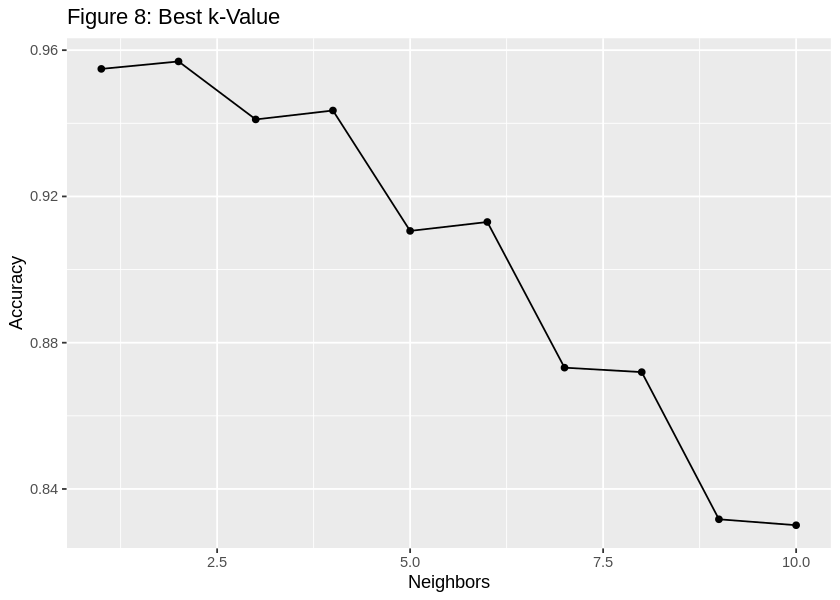

In [12]:
set.seed(1234) 

options(repr.plot.height = 5, repr.plot.width = 7)

diabetes_recipe <- recipe(Diabetes_Outcome ~ Glucose + Age, data = training_data_small) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

v_fold <- vfold_cv(training_data_small, v = 5, strata = Diabetes_Outcome) 

diabetes_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

k_values <- tibble(neighbors = seq(from = 1, to = 10, by = 1))

diabetes_workflow <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(diabetes_spec)

tuned_diabetes_workflow <- diabetes_workflow |>
    tune_grid(resamples = v_fold, grid = k_values) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cross_val_plot <- tuned_diabetes_workflow %>%
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy", title = "Figure 8: Best k-Value")
    
cross_val_plot

Our best K-value plot shows us that the accuracy of the classifier peaks at the use of 2 neighbours. After 2, it significantly decreases in accuracy. This leads us to chose K = 2 for our classifier.

#### 7. Creating the k-nearest neighbors classification model with testing data
Using the K-value we determined in the last step, we will create a recipe and model which will then be used to create our classification workflow. 

In [13]:
# Make model/workflow
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
    set_engine("kknn") |>
    set_mode("classification")

diabetes_outcome_fit <- workflow() |>
    add_recipe(diabetes_recipe) |>
    add_model(knn_spec) |>
    fit(data = training_data_small)
diabetes_outcome_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.03414634
Best kernel: rectangular
Best k: 2

#### 8. Determining the accuracy of the classifier
With the k-nearest neighbors model we made on the training data (diabetes_outcome_fit), we will make predictions on the testing data and then use these predictions to determine the accuracy of our model.

In [14]:
# Predict Testing Data
diabetes_predicted <- predict(diabetes_outcome_fit, testing_data_small) |>
    bind_cols(testing_data_small)
head(diabetes_predicted)

.pred_class Age Glucose Diabetes_Outcome
1 No          48  120     No              
2 No          26   71     No              
3 No          39   74     No              
4 No          37   88     No              
5 Yes         34  115     No              
6 No          21  124     No

Table 9: Predicted Outcomes on Testing Data 

In [15]:
# Determine Model Accuracy
diabetes_predicted_accuracy <- diabetes_predicted |> metrics(truth = Diabetes_Outcome, estimate = .pred_class)
diabetes_predicted_accuracy

.metric  .estimator .estimate
1 accuracy binary     0.6818182
2 kap      binary     0.2803395

Table 10: Accuracy of Classifier

### Discussion

**Summary of what we found — Is this what we expected?**
Through our analysis of the diabetes data set, we determined that the variables had no missing data and mean values consistent across the training and testing data set. Using scatter plot visualisations, we decided the best predictors to use in our classifier were age and glucose. Using these predictors, we created a knn classifier with the training data, and used it to predict values in our testing data. Calculating the metrics of these predictions showed us that the classifier has an accuracy of around 70%. For our predictors, we originally expected to have more than two predictors for our classifier. However, upon creating scatter plots for each variable, only age and glucose provided graphs that indicated they could be used to predict whether a person has diabetes or not. Our model had an accuracy of 70%. This was surprising, as we expected it to be on the lower side because we only had two predictors. Each predictor contributes information about the relationship between the input and output variables. With fewer predictors, we might lose information that could have improved the model’s accuracy. As such, we expected less than 70% accuracy.

**Potential Impacts and Future Questions**
The findings from this study could have substantial impacts on public health and individual patient care. By accurately classifying individuals' diabetes status based on factors like age and glucose levels, this research can facilitate early diagnosis and timely intervention, potentially reducing the incidence of severe diabetes-related complications such as heart disease, kidney failure, and vision loss. Such predictive analytics can empower healthcare providers to tailor preventive measures and treatments more effectively, improving patient outcomes. Ultimately, the findings from this study could foster advancements in predictive health analytics, benefiting both patients and healthcare systems by promoting more proactive and personalised medical care. One of the most obvious future questions given our findings is whether predictors such as age and insulin levels can be used to differentiate between the different types of diabetes when making predictions as to whether an individual is likely to suffer from the disease. According to the Centers for Disease Control and Prevention, there are three types of diabetes: type 1, type 2, and gestational. Individuals with type 1 diabetes make very little or no insulin, leading to high blood sugar levels. On the other hand, individuals with type 2 (the more common type) don’t respond to insulin, and this insulin resistance causes the pancreas to increase insulin production until it can no longer keep up. Finally, gestational diabetes refers specifically to previously non diabetic pregnant women whose bodies don’t make enough insulin during their pregnancies. Being able to differentiate between the different types when classifying an individual as diabetic or non-diabetic is crucial because the type of diabetes someone has greatly affects their possible treatments, making this an important future question.

### References
CDC. (2022, October 25). Diabetes Basics. Centers for Disease Control and Prevention. https://www.cdc.gov/diabetes/basics/index.html

Diabetes. (n.d.). Retrieved April 14, 2024, from https://www.kaggle.com/datasets/ehababoelnaga/diabetes-dataset

World Health Organization. (2023, April 5). Diabetes. World Health Organization. https://www.who.int/news-room/fact-sheets/detail/diabetes